#Trim Detail Plots

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from astropy.io import ascii
import numpy as np
import astropy.constants as const

In [3]:
indir = '/Users/yaolun/test/L1157/pacs/data/L1157_centralSpaxel_PointSourceCorrected_CorrectedYES_'
(wl_b2a, flux_b2a, unc_b2a) = np.genfromtxt(indir+'b2a.txt', skip_header=1).T
(wl_b2b, flux_b2b, unc_b2b) = np.genfromtxt(indir+'b2b.txt', skip_header=1).T
(wl_r1s, flux_r1s, unc_r1s) = np.genfromtxt(indir+'r1s.txt', skip_header=1).T
(wl_r1l, flux_r1l, unc_r1l) = np.genfromtxt(indir+'r1l.txt', skip_header=1).T
(wl_ssw, flux_ssw) = np.genfromtxt('/Users/yaolun/test/L1157/spire/data/L1157_spire_corrected_ssw.txt', skip_header=1).T
(wl_slw, flux_slw) = np.genfromtxt('/Users/yaolun/test/L1157/spire/data/L1157_spire_corrected_slw.txt', skip_header=1).T

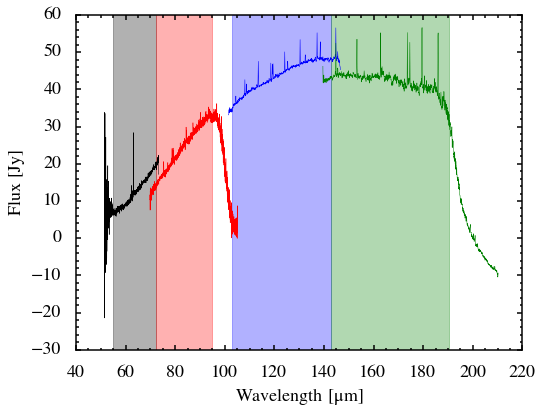

In [4]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(wl_b2a, flux_b2a, color='k', label=r'$\rm{B2A}$', linewidth=0.5)
ax.plot(wl_b2b, flux_b2b-5, color='r', label=r'$\rm{B2B}$', linewidth=0.5)
ax.plot(wl_r1s, flux_r1s-10, color='b', label=r'$\rm{R1S}$', linewidth=0.5)
ax.plot(wl_r1l, flux_r1l-15, color='g', label=r'$\rm{R1L}$', linewidth=0.5)
# ax.plot(wl_ssw, flux_ssw, color='k', label=r'$\rm{SSW}$')
# ax.plot(wl_slw, flux_slw, color='b', label=r'$\rm{SLW}$')

# ax.legend(loc='upper right', fontsize=16, numpoints=1)

ax.axvspan(54.8, 72.3, alpha=0.3, color='k')
ax.axvspan(72.3, 95.05, alpha=0.3, color='r')
ax.axvspan(103, 143, alpha=0.3, color='b')
ax.axvspan(143, 190.31, alpha=0.3, color='g')

ax.set_xlabel(r'$\rm{Wavelength\,[\mu m]}$', fontsize=18)
ax.set_ylabel(r'$\rm{Flux\,[Jy]}$', fontsize=18)
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=15,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=15,length=2.5)

fig.savefig('/Users/yaolun/test/trimmed_detail_pacs.pdf', format='pdf', dpi=300, bbox_inches='tight')

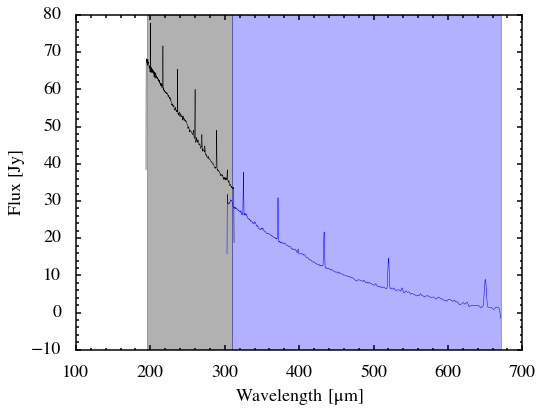

In [5]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(wl_ssw, flux_ssw, color='k', label=r'$\rm{SSW}$', linewidth=0.5)
ax.plot(wl_slw, flux_slw-5, color='b', label=r'$\rm{SLW}$', linewidth=0.5)
# ax.plot(np.hstack((wl_ssw[wl_ssw <= 310],wl_slw[wl_slw > 310])), \
#         np.hstack((flux_ssw[wl_ssw <= 310],flux_slw[wl_slw > 310]))-10)
# ax.legend(loc='upper right', fontsize=16, numpoints=1)

ax.axvspan(195, 310, alpha=0.3, color='k')
ax.axvspan(310, max(wl_slw), alpha=0.3, color='b')


ax.set_xlabel(r'$\rm{Wavelength\,[\mu m]}$', fontsize=18)
ax.set_ylabel(r'$\rm{Flux\,[Jy]}$', fontsize=18)
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=15,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=15,length=2.5)

fig.savefig('/Users/yaolun/test/trimmed_detail_spire.pdf', format='pdf', dpi=300, bbox_inches='tight')

#Three Products Comparison

In [4]:
filepath = '/Users/yaolun/test/'
wl_y, flux_y, unc_y = np.genfromtxt(filepath + 'L1157_centralSpaxel_PointSourceCorrected_CorrectedYES_trim.txt',skip_header=1).T
wl_n, flux_n, unc_n = np.genfromtxt(filepath + 'L1157_centralSpaxel_PointSourceCorrected_CorrectedNO_trim.txt',skip_header=1).T
wl_9, flux_9, unc_9 = np.genfromtxt(filepath + 'L1157_central9Spaxels_PointSourceCorrected_trim.txt',skip_header=1).T

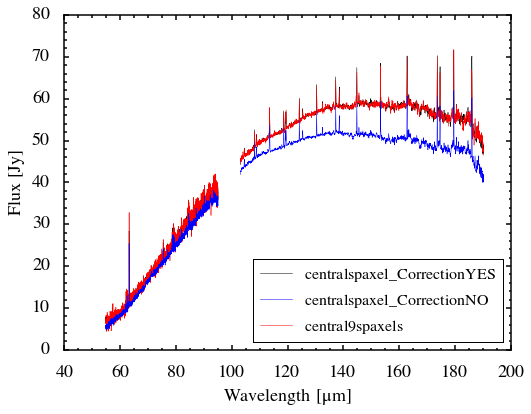

In [12]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

yes, = ax.plot(wl_y[wl_y < 100], flux_y[wl_y < 100], '-', color='k', linewidth=0.5)
ax.plot(wl_y[wl_y > 100], flux_y[wl_y > 100], '-', color='k', linewidth=0.5)
spx9, = ax.plot(wl_9[wl_9 < 100], flux_9[wl_9 < 100], '-', color='r', linewidth=0.5)
ax.plot(wl_9[wl_9 > 100], flux_9[wl_9 > 100], '-', color='r', linewidth=0.5)
no, = ax.plot(wl_n[wl_n < 100], flux_n[wl_n < 100], '-', color='b', linewidth=0.5)
ax.plot(wl_n[wl_n > 100], flux_n[wl_n > 100], '-', color='b', linewidth=0.5)

ax.legend([yes, no, spx9], [r'$\rm{centralspaxel\_CorrectionYES}$', r'$\rm{centralspaxel\_CorrectionNO}$', r'$\rm{central9spaxels}$'],\
          loc='best', numpoints=1, fontsize=16)
ax.set_xlabel(r'$\rm{Wavelength\,[\mu m]}$', fontsize=18)
ax.set_ylabel(r'$\rm{Flux\,[Jy]}$', fontsize=18)
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=15,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=15,length=2.5)

fig.savefig('/Users/yaolun/test/threeproducts.pdf', format='pdf', dpi=300, bbox_inches='tight')